In [12]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os



In [15]:
data_dir = 'D:\\all_new_projects\\machine_learning\\datasets\\lis-object-detection'

In [16]:
classes = os.listdir(data_dir)
classes

['bhabuk', 'bishnu', 'sunil', 'suraj']

In [17]:
image_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    seed=1337,        
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes
)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
 data_dir,
    validation_split=0.3,
    subset="validation",
    seed=1337,        
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes   
)

Found 48 files belonging to 4 classes.
Using 34 files for training.
Found 48 files belonging to 4 classes.
Using 14 files for validation.


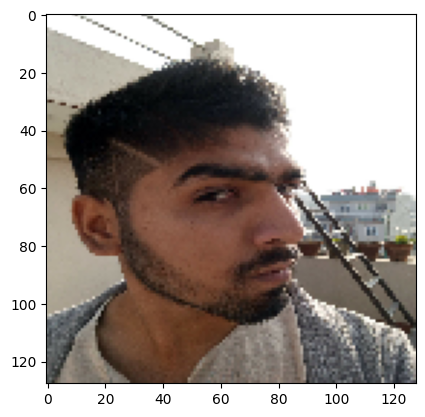

In [18]:
from matplotlib import pyplot as plt
for images, labels in train_ds:
  plt.imshow(images[1].numpy().astype("uint8"))
  break

In [19]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.models import Sequential

In [20]:
model = Sequential()

# 1st layer
model.add(Conv2D(128, (3,3), activation="relu",   input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd layer
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd layer
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th layer
model.add(Flatten())

model.add(Dense(len(classes), activation="sigmoid"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [23]:
history = model.fit(train_ds, epochs=15, batch_size=32, validation_data=val_ds)

Epoch 1/15
2/2 [==============================] - 4s 865ms/step - loss: 3.9020 - accuracy: 0.5882 - val_loss: 2.4117 - val_accuracy: 0.5000
Epoch 2/15
2/2 [==============================] - 3s 663ms/step - loss: 4.2917 - accuracy: 0.5294 - val_loss: 8.7412 - val_accuracy: 0.0000e+00
Epoch 3/15
2/2 [==============================] - 3s 687ms/step - loss: 5.9669 - accuracy: 0.1765 - val_loss: 2.3666 - val_accuracy: 0.5000
Epoch 4/15
2/2 [==============================] - 3s 686ms/step - loss: 6.4900 - accuracy: 0.5000 - val_loss: 1.8864 - val_accuracy: 0.5714
Epoch 5/15
2/2 [==============================] - 3s 658ms/step - loss: 4.6936 - accuracy: 0.5000 - val_loss: 1.2825 - val_accuracy: 0.5714
Epoch 6/15
2/2 [==============================] - 3s 694ms/step - loss: 1.6378 - accuracy: 0.7353 - val_loss: 1.1597 - val_accuracy: 0.4286
Epoch 7/15
2/2 [==============================] - 3s 658ms/step - loss: 1.3900 - accuracy: 0.7647 - val_loss: 1.3237 - val_accuracy: 0.3571
Epoch 8/15
2/2 [

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

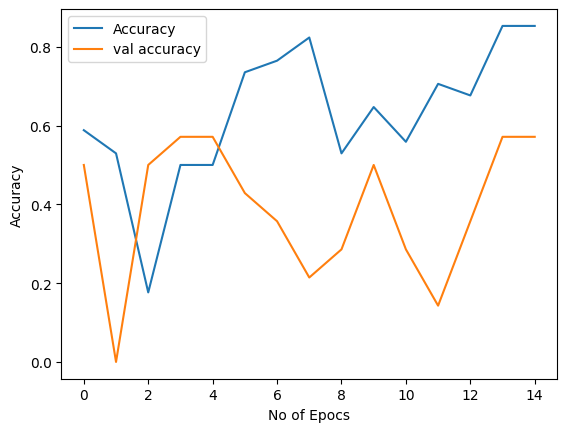

In [25]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.xlabel('No of Epocs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'val accuracy'])
plt.show()

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

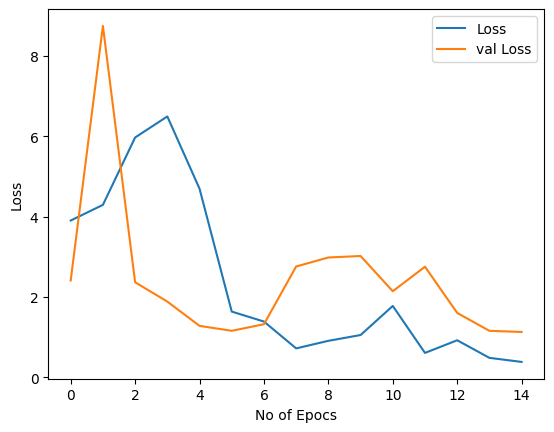

In [27]:
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('No of Epocs')
plt.ylabel('Loss')
plt.legend(['Loss', 'val Loss'])
plt.show()

In [28]:
import cv2
def prepare(filepath):
  IMG_SIZE = 128
  img_array = cv2.imread(filepath)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [29]:
classes

['bhabuk', 'bishnu', 'sunil', 'suraj']

In [30]:
import numpy as np
personMap = {
    0: 'bhabuk',
    1: 'bishnu',
    2: 'sunil',
    3: 'suraj'
}

def predict_image(filepath):
    index = np.argmax(model.predict([prepare(filepath)]))
    print(index)
    return personMap[index]

In [36]:
predict_image('D:\\all_new_projects\\machine_learning\\datasets\\lis-object-detection\\sunil\\IMG_20230525_163510.jpg')

1/1 [==============================] - 0s 58ms/step
1


'bishnu'

In [32]:
model.save('D://all_new_projects//machine_learning//lis-image-classification//lis_image.hdf5')

In [6]:
loaded_model = tf.keras.models.load_model('D://all_new_projects//machine_learning//lis-image-classification//lis_image.hdf5')

In [7]:
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)      

In [11]:
np.argmax(loaded_model.predict([prepare('D://all_new_projects//machine_learning//lis-image-classification//test//1685027872411.jpg')]))

(128, 128, 3)
1/1 [==============================] - 1s 738ms/step


3